In [2]:
import stlcg
# import stlviz as viz
# from stlcg import Expression
# from utils import print_learning_progress

In [3]:
from stlcg import stlcg

In [7]:
import torch
import numpy as np
# import matplotlib.pyplot as plt
# import importlib

## Create traces from numpy arrays

In [8]:
data = np.loadtxt('/home/lukas/dev/mbse4vav/data/ros_csv/2023-09-28_2d931cab-89e5-4c63-8705-58923f6e0598/rosbag2_2023_09_28-17_12_37.csv',delimiter=',',skiprows=1)

In [10]:
time = data[:,0]
wall_distance = data[:,1]

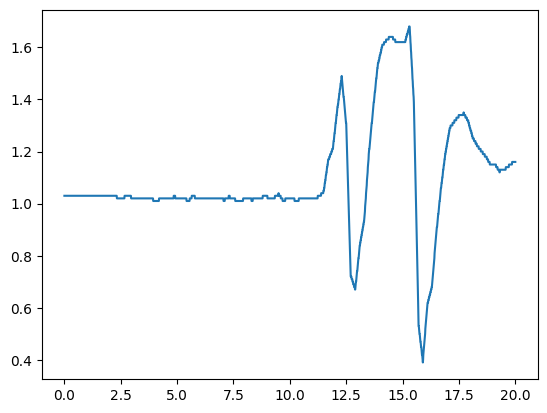

In [93]:
plt.plot(data[:,0], data[:,1])

In [11]:
min(data[:,1])

0.39

In [12]:
wall_distance = wall_distance.reshape([1, time.shape[0], 1])
x = torch.tensor(wall_distance, requires_grad=False)
c = torch.tensor(0.5, dtype=torch.float, requires_grad=True)

# Constructing STL formulas

### One way to construct formulas is to explicitly call the constructors

### Another way (preferred way) is to use the math operators which have been overloaded
#### (less than, greater than, equal, not, and, or)
#### Still need to use the Always and Or constructors explicitly

In [13]:
x_exp = stlcg.Expression('x', x)    # The first argument is the name of the variable, the second argument is the numerical value
c_exp = stlcg.Expression('c', c)         # If the variable is a parameter of the STL, then input the actual value

In [14]:
theta = x_exp >= c
formula = stlcg.Always(subformula=theta)
print(formula)
# viz.make_stl_graph(formula)

◻ [0, inf]( x >= 0.5 )


In [15]:
# any of the inputs will work
# inputs = (w, (x_exp, w_exp))
inputs = (x_exp)
# inputs = (w_exp, (x_exp, w_exp))
# inputs = (w, (x, w))

pscale = 1     # "pscale" is the scale used for evaluting predicates
scale = -1     # "scale" is the scale used in the maxish/minish function. <0 defaults to the true min/max
formula.robustness(inputs, pscale=pscale, scale=scale)

tensor([[[-0.1100]]], dtype=torch.float64, grad_fn=<UnsqueezeBackward0>)